### Name: Dhaval Patel
### Title: Assignment 3  - Regression Based Models

In [1]:
import pandas as pd
import numpy as np
import math
from operator import itemgetter

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import warnings
warnings.filterwarnings("ignore")

In [2]:
INFILE = "cleandata_hmeqloss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

df = pd.read_csv( INFILE )
'''
Print a transpose of the data so that it will fit on the screen cleaned data missing numeric values already imputed
'''
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
z_REASON_DebtCon,0.000000,0.000000,0.000000,0.000000,0.000000
z_REASON_HomeImp,1.000000,1.000000,1.000000,0.000000,1.000000
z_JOB_Mgr,0.000000,0.000000,0.000000,0.000000,0.000000
z_JOB_Office,0.000000,0.000000,0.000000,0.000000,1.000000
z_JOB_Other,1.000000,1.000000,1.000000,0.000000,0.000000
z_JOB_ProfExe,0.000000,0.000000,0.000000,0.000000,0.000000
z_JOB_Sales,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
"""
Remove Outliers
"""

dt = df.dtypes #give me a list of all the variable in my dataframe
numList = []
for i in dt.index :
#     print(i, dt[i])
    if i in ( [ TARGET_F, TARGET_A ] ) : continue #going to throw away my target variables for right now 
    if dt[i] in (["float64","int64"]) : numList.append( i ) #only going to keep numeric variables put it inside numlist

for i in numList :
#     print(" ------- ")
#     print(i)
    theMean = df[i].mean()
    theSD = df[i].std()
    theMax = df[i].max()
    theCutoff = round( theMean + 3*theSD )
    if "z_" in i or "M_" in i : continue
    if theMax < theCutoff : continue
    FLAG = "O_" + i
    TRUNC = "TRUNC_" + i
    df[ FLAG ] = ( df[i] > theCutoff )+ 0
    df[ TRUNC ] = df[ i ]
    df.loc[ df[TRUNC] > theCutoff, TRUNC ] = theCutoff
    df = df.drop( i, axis=1 )

dt = df.dtypes
numList = []
for i in dt.index :
#     print(i, dt[i])
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if "O_" in i or "z_" in i  or "M_" in i : continue
    if dt[i] in (["float64","int64"]) : numList.append( i )

for i in numList :
    print(i)


TRUNC_LOAN
TRUNC_IMP_VALUE
TRUNC_IMP_MORTDUE
TRUNC_IMP_YOJ
TRUNC_IMP_DEROG
TRUNC_IMP_DELINQ
TRUNC_IMP_CLAGE
TRUNC_IMP_NINQ
TRUNC_IMP_CLNO
TRUNC_IMP_DEBTINC


In [4]:
"""
SPLIT DATA 
"""
X = df.copy() #making an exact copy of our dataframe
X = X.drop(TARGET_F, axis=1) #dropping target flag variable
X = X.drop(TARGET_A, axis=1) #dropping target damage amount variable
Y = df[[TARGET_F, TARGET_A]] #Y variable is only going to have target variables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)

F = ~ Y_train[TARGET_A].isna()   
W_train = X_train[F].copy() #Flag for input variables its better practice to make a copy of it 
Z_train = Y_train[F].copy() #Flag for target variables its better practice to make a copy of it

F = ~ Y_test[TARGET_A].isna()   
W_test = X_test[F].copy() #Flag for input variables its better practice to make a copy of it 
Z_test = Y_test[F].copy() #Flag for target variables its better practice to make a copy of it


#Handling Outliers for Target Variables TARGET_LOSS_AMT 
F = Z_train[TARGET_A] > 55000     #let's cap it at 55000 dollars worth of loss amount if the loans defaults
Z_train.loc[F, TARGET_A] = 55000 

F = Z_test[TARGET_A] > 55000
Z_test.loc[F, TARGET_A] = 55000

In [5]:
"""
MODEL ACCURACY METRICS
"""

def getProbAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    probs = MODEL.predict_proba( X )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]


def print_ROC_Curve( TITLE, LIST ) :
    fig = plt.figure(figsize=(6,4))
    plt.title( TITLE )
    for theResults in LIST :
        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc
        plt.plot(fpr, tpr, label = theLabel )
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    
def print_Accuracy( TITLE, LIST ) :
    print( TITLE )
    print( "======" )
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print( NAME, " = ", ACC )
    print( "------\n\n" )

    
def getAmtAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    MEAN = Y.mean()
    RMSE = math.sqrt( metrics.mean_squared_error( Y, pred))
    return [NAME, RMSE, MEAN]

In [6]:
"""
DECISION TREE GET VARIABLES USED IN THE MODEL FUNCTION
"""

def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

## Decision Tree Classifier 

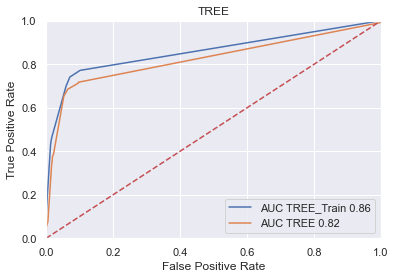

TREE CLASSIFICATION ACCURACY
TREE_Train  =  0.8928271812080537
TREE  =  0.8859060402684564
------




In [7]:
WHO = "TREE"

CLM = tree.DecisionTreeClassifier( max_depth = 4)
CLM = CLM.fit(X_train, Y_train[TARGET_F])

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ])

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

feature_cols = list( X.columns.values )
vars_tree_flag = getTreeVars( CLM, feature_cols ) 

## Decision Tree Regression 

In [8]:
AMT = tree.DecisionTreeRegressor( max_depth=4)
AMT = AMT.fit( W_train, Z_train[TARGET_A])

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( AMT, feature_cols )

TREE_CLM = TEST_CLM.copy()
TREE_AMT = TEST_AMT.copy()


TREE RMSE ACCURACY
TREE_Train  =  4491.106341702886
TREE  =  5522.483680969053
------




In [9]:
"""
FUNCTION FOR GETTING VARIABLES USED IN THE RANDOM FOREST AND GRADIENT BOOSTING MODELS
"""


def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

## Random Forest Classifier

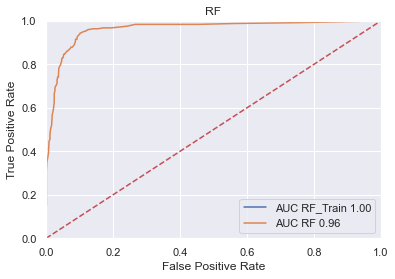

RF CLASSIFICATION ACCURACY
RF_Train  =  1.0
RF  =  0.9144295302013423
------




In [10]:
WHO = "RF"

CLM = RandomForestClassifier( n_estimators = 100, random_state=1 )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( CLM, feature_cols )


## Random Forest Tree Regression 

In [11]:
AMT = RandomForestRegressor(n_estimators = 100, random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( AMT, feature_cols )

for i in vars_RF_amt :
    print( i )

RF_CLM = TEST_CLM.copy()
RF_AMT = TEST_AMT.copy()

RF RMSE ACCURACY
RF_Train  =  1240.5527800676525
RF  =  2780.278461970596
------


('TRUNC_LOAN', 100)
('TRUNC_IMP_CLNO', 13)
('TRUNC_IMP_DEBTINC', 6)
('M_DEBTINC', 4)


## Gradient Boosting Classifier

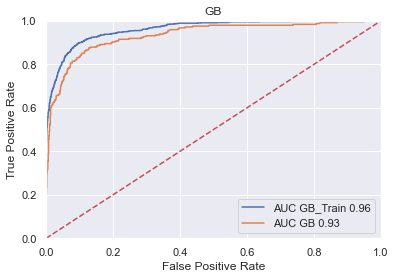

GB CLASSIFICATION ACCURACY
GB_Train  =  0.9226090604026845
GB  =  0.9035234899328859
------




In [12]:
WHO = "GB"

CLM = GradientBoostingClassifier( random_state=1 )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( CLM, feature_cols )

## Gradient Boosting Regression

In [13]:
AMT = GradientBoostingRegressor(random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( AMT, feature_cols )

for i in vars_RF_amt :
    print( i )

GB_CLM = TEST_CLM.copy()
GB_AMT = TEST_AMT.copy()

GB RMSE ACCURACY
GB_Train  =  1240.0938112372605
GB  =  2201.8194437335387
------


('TRUNC_LOAN', 100)
('TRUNC_IMP_CLNO', 13)
('TRUNC_IMP_DEBTINC', 6)
('M_DEBTINC', 4)


### Function to get Coefficients for both Logistic and Linear Regression

In [14]:
def getCoefLogit( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_[0]
    for coef, feat in zip(MODEL.coef_[0],varNames):
        coef_dict[feat] = coef
    print("\nFLAG")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )
        
        
def getCoefLinear( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_
    for coef, feat in zip(MODEL.coef_,varNames):
        coef_dict[feat] = coef
    print("\nLOSS AMOUNT")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )

## Logistic Regression:
### Develop a logistic regression model to determine the probability of a loan default. Use all of the variables.

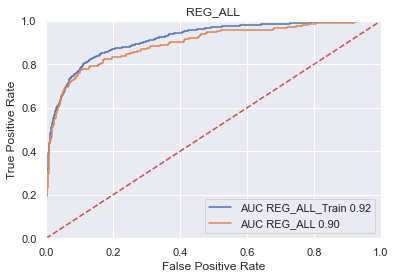

REG_ALL CLASSIFICATION ACCURACY
REG_ALL_Train  =  0.893246644295302
REG_ALL  =  0.886744966442953
------




In [15]:
"""
LOGISTIC REGRESSION ALL VARIABLES
"""

WHO = "REG_ALL"
CLM = LogisticRegression(solver='newton-cg', max_iter=1000)
CLM = CLM.fit(X_train, Y_train[TARGET_F])

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ])
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

# REG_ALL_CLM_COEF = getCoefLogit( CLM, X_train )
REG_ALL_CLM = TEST_CLM.copy()

### Analysis 
#### Display a ROC curve for the test data with all your models on the same graph (tree based and regression).
- Since the following ROC curve is using all the variables in logistics regression it still has 90% accuracy which is really good. We need to have our models to be less complicated as simple as possible. But its decent to start off by using all variables in the regression model. I would only recommend using REG_ALL variables for regression model as a starting point to see the accuracy and how model behaves when we use all variables.  

### Develop a logistic regression model to determine the probability of a loan default. Use the variables that were selected by a DECISION TREE.

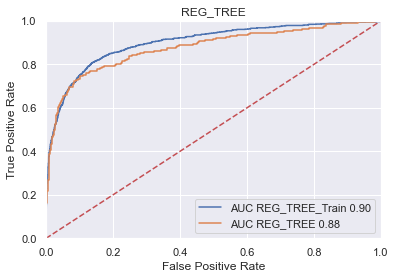

REG_TREE CLASSIFICATION ACCURACY
REG_TREE_Train  =  0.8871644295302014
REG_TREE  =  0.8875838926174496
------




In [16]:
"""
LOGISTIC REGRESSION TREE
"""

WHO = "REG_TREE"

#We are only using the variables that the decision tree likes
CLM = LogisticRegression( solver = 'newton-cg', max_iter=1000)
CLM = CLM.fit( X_train[vars_tree_flag], Y_train[TARGET_F])

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[vars_tree_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[vars_tree_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

# REG_TREE_CLM_COEF = getCoefLogit( CLM, X_train[vars_tree_flag] )
REG_TREE_CLM = TEST_CLM.copy()

### Analysis: 
#### Display a ROC curve for the test data with all your models on the same graph (tree based and regression).
- The ROC curve with Logistics Regression Decision Tree (REG_TREE) has accuracy rate of 88% for test dataset is much better than accurate rate for decision tree based models (TREE) which as 83%. They both are using same variables for build models. I would recommend going with Regression Tree instead of tree based models which compares these two model for this particular dataset. 

### Develop a logistic regression model to determine the probability of a loan default. Use the variables that were selected by a RANDOM FOREST.

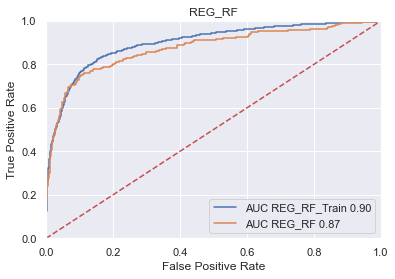

REG_RF CLASSIFICATION ACCURACY
REG_RF_Train  =  0.8800335570469798
REG_RF  =  0.87751677852349
------




In [17]:
"""
LOGISTICS REGRESSION RANDOM FOREST
"""

WHO = "REG_RF"

print("\n\n")
RF_flag = []
for i in vars_RF_flag : #We saved these variables vars_RF_flag earlier in the program 
#     print(i)
    theVar = i[0] #Over here what we are doing is taking this data and using just the name of the variables
    RF_flag.append( theVar ) #We are saving the variable name into RF_flag


CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[RF_flag], Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[RF_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[RF_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

# REG_RF_CLM_COEF = getCoefLogit( CLM, X_train[RF_flag] )
REG_RF_CLM = TEST_CLM.copy()


### Analysis: 
#### Display a ROC curve for the test data with all your models on the same graph (tree based and regression).
- The ROC curve with Logistics Regression Decision Tree (REG_RF) has accuracy rate of 87% for test dataset has lost accuracy when compared to random forest model (RF) which as 96% accuracy. They both are using same variables for build models. I would recommend going with Random Forest model instead of logistic regression random forest model which compares these two model for this particular dataset. 

### Develop a logistic regression model to determine the probability of a loan default. Use the variables that were selected by a GRADIENT BOOSTING model.

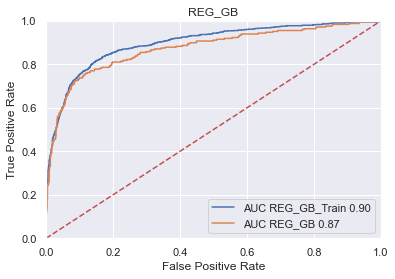

REG_GB CLASSIFICATION ACCURACY
REG_GB_Train  =  0.8810822147651006
REG_GB  =  0.8808724832214765
------




In [18]:
"""
LOGISTICS REGRESSION GRADIENT BOOSTING

"""

WHO = "REG_GB"

print("\n\n")
GB_flag = []
for i in vars_GB_flag:
#     print(i)
    theVar = i[0]
    GB_flag.append(theVar)
    
CLM = LogisticRegression( solver='newton-cg', max_iter=1000)
CLM = CLM.fit( X_train[GB_flag], Y_train[ TARGET_F])

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[GB_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[GB_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

# REG_GB_CLM_COEF = getCoefLogit( CLM, X_train[GB_flag] )
REG_GB_CLM = TEST_CLM.copy()


### Analysis: 
#### Display a ROC curve for the test data with all your models on the same graph (tree based and regression).
- The ROC curve with Logistics Regression Decision Tree (REG_GB) has accuracy rate of 88% for both training and test dataset. The ROC curve accuracy on Logistic Regression Gradient Boosting mode on test dataset it has 87% accuracy compared to Gradient Boosting model (GB) which as 87% accuracy. They both are using same variables for build models. I would recommend going with Gradient Boosting model instead of logistic regression Gradient boosting model which compares these two model for this particular dataset. 

### Build Forwards Stepwise Logistic Regression Function for Variable Selection 
- Copy (X_train) train data into new dataset called U_train based on the variables what Decision Tree liked
- Build logistic regression with best model using 1 to as many variable needed it takes really long time

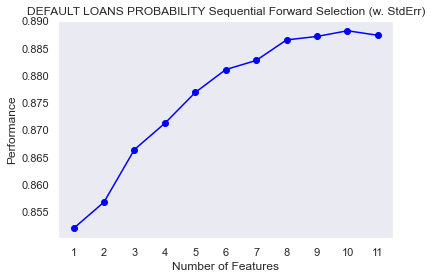

 ................... 
argmax
feature_names    (0, 1, 2, 3, 4, 6, 7, 8, 9, 10)
avg_score                               0.888214
Name: 10, dtype: object
 ................... 
('0', '1', '2', '3', '4', '6', '7', '8', '9', '10')
Variables Selected By SFS: 

TRUNC_IMP_DEBTINC
z_JOB_Other
M_VALUE
M_DEROG
M_DEBTINC
TRUNC_IMP_YOJ
TRUNC_IMP_DEROG
O_IMP_DELINQ
TRUNC_IMP_DELINQ
TRUNC_IMP_CLAGE

FLAG
---------
Total Variables:  9
INTERCEPT  =  -5.252129387674237
M_DEBTINC  =  2.74292939602802
TRUNC_IMP_DEBTINC  =  0.10598727234385079
TRUNC_IMP_DELINQ  =  0.7072470866267293
TRUNC_IMP_CLAGE  =  -0.006083874024488863
TRUNC_IMP_DEROG  =  0.7536919219477693
M_VALUE  =  3.543145496655478
TRUNC_IMP_CLNO  =  -0.01585026506228718
TRUNC_IMP_YOJ  =  -0.013365840769067171


In [19]:
U_train = X_train[ vars_tree_flag]
stepVarNames = list( U_train.columns.values)
maxCols = U_train.shape[1]

sfs = SFS( LogisticRegression( solver='newton-cg', max_iter=100),
          k_features=(1, maxCols), 
          forward=True, 
          floating=False,
          cv=3
         ) 

sfs.fit(U_train.values, Y_train[ TARGET_F ].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('DEFAULT LOANS PROBABILITY Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

print(" ................... ")
maxIndex = dfm.avg_score.argmax()
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

print("Variables Selected By SFS: \n")
for i in finalStepVars :
    print(i)

U_train = X_train[ finalStepVars ]
U_test = X_test[ finalStepVars ]

REG_GB_CLM_COEF = getCoefLogit( CLM, X_train[GB_flag] )
REG_GB_CLM = TEST_CLM.copy()

### Develop a logistic regression model to determine the probability of a loan default. Use the variables that were selected by STEPWISE SELECTION.

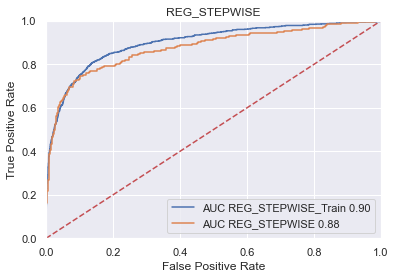

REG_STEPWISE CLASSIFICATION ACCURACY
REG_STEPWISE_Train  =  0.8869546979865772
REG_STEPWISE  =  0.8875838926174496
------


For one of the Regression Models, print the coefficients. Do the variables make sense?

FLAG
---------
Total Variables:  11
INTERCEPT  =  -5.473989562333851
TRUNC_IMP_DEBTINC  =  0.10440643048454225
z_JOB_Other  =  0.3126047221107822
M_VALUE  =  3.7901887444786166
M_DEROG  =  -0.7677993789964631
M_DEBTINC  =  2.7516851002591447
TRUNC_IMP_YOJ  =  -0.01678335251219504
TRUNC_IMP_DEROG  =  0.6757340170620829
O_IMP_DELINQ  =  2.097549453444879
TRUNC_IMP_DELINQ  =  0.6298143501830765
TRUNC_IMP_CLAGE  =  -0.006448992626907168


In [20]:
"""
LOGISTICS REGRESSION STEPWISE

"""
WHO = "REG_STEPWISE"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( U_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, U_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

print("For one of the Regression Models, print the coefficients. Do the variables make sense?")
REG_STEP_CLM_COEF = getCoefLogit( CLM, U_train )
REG_STEP_CLM = TEST_CLM.copy()

### Analysis: 
#### Display a ROC curve for the test data with all your models on the same graph (tree based and regression).
- The ROC curve with Logistics Regression Stepwise (REG_STEPWISE) has accuracy rate of 88% for both training and test dataset. The ROC curve accuracy on Regression Stepwise on test dataset it has 87% accuracy compared to simple decision tree based model has 83%. The forward stepwise used variables that trees liked. I would recommend going with Regression Stepwise model instead of tree based model which compares these two model for this particular dataset. 


#### For one of the Regression Models, print the coefficients. Do the variables make sense? If not, what would you recommend?
- I printed the coefficients for Logistics Regression variables. All the variables mentioned below do make sense 


- TRUNC_IMP_DEBTINC  =  0.1044 (The positive value of Debt Income ratio shows more people have defaulted loans if they have higher Debt Income ratio.)


- M_VALUE  =  3.790 (People who had missing home value which was fixed after really high chance of default loans since it home equity insurance company to trust people if their reasoning of all is Home Improvement or Consolidating debt and value of the house is missing.) 

- M_DEROG  =  -0.767 (If they lower deliniquencies report they less chance of having defaulted loans) 


- M_DEBTINC  =  2.751 (Similarly if the debt income ratio value is missing they have more chance of having defaulted loans.)


- TRUNC_IMP_YOJ  =  -0.0167 (This results shows that these people have higher values in Year on Job (YOJ) which means they are more stable and assuming less riskier job the probability of having default loans decreases as results shows TRUN_IMP_YOJ value close to 0 ) 


- TRUNC_IMP_DEROG, TRUNC_IMP_DELINQ, and O_IMP_DELINQ. (These variables do make sense as we can see these variables have positive values means that they higher higher derogatory marks on credit records, and outliers in the delinquencies reports might have shown these people have defaulted loans could be because of bankruptcy. 

-  TRUNC_IMP_CLAGE  =  -0.0064 (Again, I would not recommend this variables based on the results its fluctuating a lot there is almost 50% percent probability of person having either default loans or not. If you have had credit for a long time, you are considered less risky than a new high school student that doesn't mean they cannot have default loans.

### Logistics Regression ROC Curve and Accuracy for ALL Models

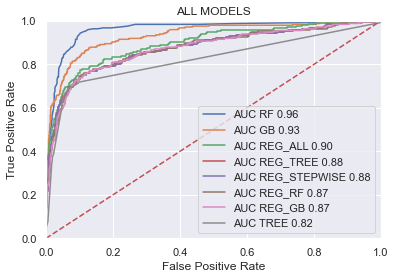

ALL MODELS ALL CLASSIFICATION ACCURACY
RF  =  0.9144295302013423
GB  =  0.9035234899328859
REG_TREE  =  0.8875838926174496
REG_STEPWISE  =  0.8875838926174496
REG_ALL  =  0.886744966442953
TREE  =  0.8859060402684564
REG_GB  =  0.8808724832214765
REG_RF  =  0.87751677852349
------




In [21]:
WHO = "ALL MODELS"

#Classifier Models
#Creating a list of all the models we have created 
ALL_CLM = [ TREE_CLM, RF_CLM, GB_CLM, REG_ALL_CLM, REG_TREE_CLM, REG_RF_CLM, REG_GB_CLM, REG_STEP_CLM ]

# I am going to sort this by 4 element in the list ROC curve 
ALL_CLM = sorted( ALL_CLM, key = lambda x: x[4], reverse=True )
print_ROC_Curve( WHO, ALL_CLM ) 

#Sorting is by the accuracy of the model 
ALL_CLM = sorted( ALL_CLM, key = lambda x: x[1], reverse=True )
print_Accuracy( WHO + " ALL CLASSIFICATION ACCURACY", ALL_CLM )

### Analysis: 
#### Display a ROC curve for the test data with all your models on the same graph (tree based and regression).

- Based on the ROC accuracy curve results. The random forest tree model (RF) as highest accuracy compare to all other models. Second is Gradient boosting model (GB) at 93% I have seen these model doing fine but was surprise they are better than regression tree based models. The Regression of All (REG_ALL) variables is 90% accuracy even though it has higher accuracy its uses all the variables in the dataset for predicting target variables which not efficient and time consuming. I would recommend using Regression Tree Based Models (REG_TREE) which is 88% accuracy because its faster and simpler model using less variables its fine to loss some accuracy but more efficient than REG_ALL model.


- Based on the All Classification Accuracy we can see that Random Forest and Gradient Boosting model are on the top in terms of accuracy similar to ROC results. But Regression Tree has very small margin of higher accracy then regression all variables models which makes sense based on the reasoning mentioned above it uses less variables, not time consuming and simpler model compare to REG_ALL model. Its surprising to see ROC curve results for simple Decision Tree Based model is lowest at 83% accuracy compare all other models but has higher classification accuracy rate of 88% compare to regression (REG_GB) gradient boosting model and (REG_RF) random forest model 

## Linear Regression
### Develop a linear regression model to determine the expected loss if the loan defaults. Use all of the variables.

In [22]:
"""
LINEAR REGRESSION ALL VARIABLES
"""

WHO = "REG_ALL"

AMT = LinearRegression()
AMT = AMT.fit( W_train, Z_train[TARGET_F])

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [TRAIN_AMT, TEST_AMT])

varNames = list (X_train.columns.values)

# REG_ALL_AMT_COEF = getCoefLinear( AMT, X_train )
REG_ALL_AMT = TEST_AMT.copy()

REG_ALL RMSE ACCURACY
REG_ALL_Train  =  16971.51613611921
REG_ALL  =  16998.678121282483
------




### Analysis 
#### List the RMSE for the test data set for all of the models created (tree based and regression). 
- Since the following RMSE accuracy for linear regression using all the variables measuring the difference between values predicted by a model and their actual values for loss amount loan not repaid of 16,000 dollars seems to be a lot higher compare to tree based models. We need to have our models to be less complicated as simple as possible. But its decent to start off by using all variables in the regression model. I would only recommend using REG_ALL variables for regression model as a starting point to see the RMSE accuracy and how model behaves when we use all variables. 

### Develop a linear regression model to determine the expected loss if the loan defaults. Use the variables that were selected by a DECISION TREE.

In [23]:
WHO = "REG_TREE"

AMT = LinearRegression()
AMT = AMT.fit( W_train[vars_tree_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[vars_tree_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[vars_tree_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

varNames = list( X_train.columns.values )


# REG_TREE_AMT_COEF = getCoefLinear( AMT, X_train[vars_tree_amt] )
REG_TREE_AMT = TEST_AMT.copy()


REG_TREE RMSE ACCURACY
REG_TREE_Train  =  4307.4749817092925
REG_TREE  =  4301.963358361646
------




### Analysis: 
#### List the RMSE for the test data set for all of the models created (tree based and regression).
- The average RMSE score for loss amount not repaid with Linear Regression Decision Tree (REG_TREE) is 4301 dollars of for test dataset is much better than RMSE score for decision tree based models (TREE) is 5522 dollars there is almost 2000 dollars difference between RMSE score of each model. They both are using same variables for build models which trees liked. I would recommend going with Regression Tree instead of tree based models because its smaller loan amount not repaid to the bank assume loans defaulted for this particular dataset.

### Develop a linear regression model to determine the expected loss if the loan defaults. Use the variables that were selected by a RANDOM FOREST.

In [24]:
"""
LINEAR REGRESSION RANDOM FOREST
"""

WHO = "REG_RF"

print("\n\n")
RF_amt = []
for i in vars_RF_amt: #We are using same variables used by Random Forest tree based model to calculate loss amount
    # print(i)
    theVar = i[0]
    RF_amt.append( theVar )

AMT = LinearRegression()
AMT = AMT.fit( W_train[RF_amt], Z_train[TARGET_A])

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[RF_amt], Z_train[TARGET_A])
TEST_AMT = getAmtAccuracyScores(WHO, AMT, W_test[RF_amt], Z_test[TARGET_A])
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

# REG_RF_AMT_COEF = getCoefLinear( AMT, X_train[RF_amt] )
REG_RF_AMT = TEST_AMT.copy()




REG_RF RMSE ACCURACY
REG_RF_Train  =  4384.862092423268
REG_RF  =  4360.610292020044
------




### Analysis: 
#### List the RMSE for the test data set for all of the models created (tree based and regression).
- The average RMSE score for loss amount not repaid with Linear Regression Random Forest (REG_TREE) is 4360 dollars of for test dataset is much higher than averge RMSE score for Random Forest tree based models (RF) is 2780 dollars there is almost 1500 dollars difference between RMSE score of each model. They both are using same variables for build models which Random Forest model liked. I would recommend going with Random Forest tree based model instead of Regression Random Forest model because its smaller loan amount not repaid to the bank for this particular dataset.

### Develop a linear regression model to determine the expected loss if the loan defaults. Use the variables that were selected by a GRADIENT BOOSTING model.

In [25]:
"""
LINEAR REGRESSION GRADIENT BOOSTING 
"""

WHO = "REG_GB"

print("\n\n")
GB_amt = []
for i in vars_GB_amt :
    # print(i)
    theVar = i[0]
    GB_amt.append( theVar )
    

AMT = LinearRegression()
AMT = AMT.fit( W_train[GB_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[GB_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[GB_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

# REG_GB_AMT_COEF = getCoefLinear( AMT, X_train[GB_amt] )
REG_GB_AMT = TEST_AMT.copy()




REG_GB RMSE ACCURACY
REG_GB_Train  =  4043.551329405321
REG_GB  =  4029.7840135710135
------




### Analysis: 
#### List the RMSE for the test data set for all of the models created (tree based and regression).
- The average RMSE score for loss amount not repaid with Linear Regression Gradient Boosting (REG_GB) is 4029 dollars of for test dataset is much higher than averge RMSE score for Random Forest tree based models (RF) is 2201 dollars there is almost 2000 dollars difference between RMSE score of each model. They both are using same variables for build models which Gradient Boosting model liked. I would recommend going with Gradient Boosting tree based model instead of Regression Gradient Boosting model because its smaller loan amount not repaid to the bank for this particular dataset.

### Develop a linear regression model to determine the expected loss if the loan defaults. Use the variables that were selected by STEPWISE SELECTION.

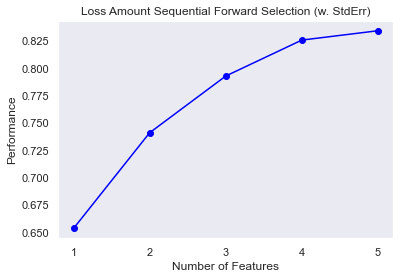

 ................... 
argmax
feature_names    (0, 1, 2, 3, 4)
avg_score               0.834263
Name: 5, dtype: object
 ................... 
('0', '1', '2', '3', '4')
TRUNC_LOAN
TRUNC_IMP_CLNO
TRUNC_IMP_DEBTINC
M_DEBTINC
TRUNC_IMP_CLAGE


In [26]:
# Copy train data into new dataset called V_train based on the variables what Gradient Boosting liked
# Build linear regression with best model using 1 to as many variable needed
# This will be a little bit faster since we are using linear regression 

V_train = W_train[ GB_amt ]
stepVarNames = list( V_train.columns.values )
maxCols = V_train.shape[1]

sfs = SFS( LinearRegression(),
           k_features=( 1, maxCols),
           forward=True,
           floating=False,
           scoring='r2',
           cv=5
         )

sfs.fit(V_train.values, Z_train[ TARGET_A ].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('Loss Amount Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

print(" ................... ")
maxIndex = dfm.avg_score.argmax()
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

for i in finalStepVars :
    print(i)

V_train = W_train[ finalStepVars ]
V_test = W_test[ finalStepVars ]
            

In [27]:
"""
LINEAR REGRESSION STEPWISE
"""

WHO = "REG_STEPWISE"

AMT = LinearRegression()
AMT = AMT.fit( V_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, V_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


REG_STEP_AMT_COEF = getCoefLinear( AMT, V_train )

REG_STEP_AMT = TEST_AMT.copy()


REG_STEPWISE RMSE ACCURACY
REG_STEPWISE_Train  =  4043.551329405321
REG_STEPWISE  =  4029.7840135710135
------



LOSS AMOUNT
---------
Total Variables:  6
INTERCEPT  =  -12990.102898292584
TRUNC_LOAN  =  0.7811032153671928
TRUNC_IMP_CLNO  =  296.780759504102
TRUNC_IMP_DEBTINC  =  193.84552770224016
M_DEBTINC  =  5766.133642473953
TRUNC_IMP_CLAGE  =  -25.06345014576534


### Analysis: 
#### List the RMSE for the test data set for all of the models created (tree based and regression). 
- The average RMSE score for loss amount not repaid with Linear Regression Stepwise Function (REG_STEPWISE) is 4029 dollars using test dataset is much higher than averge RMSE score for Gradient Boosting tree based models (GB) is 2201 dollars there is almost 2000 dollars difference between RMSE score of each model. They both are using same variables for build models which Gradient Boosting model liked. I would recommend going with Gradient Boosting tree based model instead of Regression Stepwise model because its smaller loan amount not repaid to the bank for this particular dataset. Also, Regression Stepwise would be larger and less efficient in terms of variables selection technqiue than Gradient Boosting model for this dataset.


#### For one of the Regression Models, print the coefficients. Do the variables make sense? If not, what would you recommend?
- I printed the coefficients for Linear Regression variables Step wise function. All the variables mentioned below do make sense.


- TRUNC_LOAN  =  0.7811 (The positive value of LOAN amounts shows more people have higher amount of loan not repaid if they have bigger amount more risky the person which makes sense based on the criteria.)


- TRUNC_IMP_CLNO  =  296.78 (Showing a really positive value means a lot of people have higher number of credit lines, and this variables could have gone either scenario either person is more trustworthy. But in our case based on the model a too many credit lines means that they have potential to run up a lot of debt causing higher loss amount not repaid to the bank) 

- TRUNC_IMP_DEBTINC  =  193.84 (The higher Debt Income Ratio means that people are loss amount increase if person has higher Debt Income Ratio) 


- M_DEBTINC  =  5766 (Similarly if the debt income ratio value is missing which was fixed have higher loans amounts because they are trustworthy compare to imputated debtinc ratio kind of doesn't make sense.)


- TRUNC_IMP_CLAGE  =  -25.06 (In our dataset looks like most of people had credit for a long time, considered less risky showing smaller amount of loan not repaid ) 


### Linear Regression RMSE Accuracy for ALL Models

In [28]:
#Linear Regression Models
#Creating a list of all the models we have created 
ALL_AMT = [ TREE_AMT, RF_AMT, GB_AMT, REG_ALL_AMT, REG_TREE_AMT, REG_RF_AMT, REG_GB_AMT, REG_STEP_AMT]

#Sort by Accuracy of the Damages 
ALL_AMT = sorted( ALL_AMT, key = lambda x: x[1] )

print_Accuracy( "ALL LOSS AMOUNT MODEL ACCURACY", ALL_AMT )

ALL LOSS AMOUNT MODEL ACCURACY
GB  =  2201.8194437335387
RF  =  2780.278461970596
REG_GB  =  4029.7840135710135
REG_STEPWISE  =  4029.7840135710135
REG_TREE  =  4301.963358361646
REG_RF  =  4360.610292020044
TREE  =  5522.483680969053
REG_ALL  =  16998.678121282483
------




### Analysis: 
#### List the RMSE for the test data set for all of the models created (tree based and regression).

- Based on the RMSE accuracy curve results measuring the difference between values predicted by a model and their actual values for loss amount loan Gradient Boosting tree model (GB) as lowest average RMSE score of 2201 dollars loss amount not repaid compare to all other models. Second is Random Forest model (RF) with Root Mean Square error of 2780 dollars loss amount.  I have seen these model doing fine but was surprise they are better than regression based models. The Regression of All (REG_ALL) variables is larger difference in terms of RMSE accuracy of 16000 dollars perfomed really bad was surprising even though used all the variables in the dataset for predicting target variables which not efficient and time consuming. Based on the All Loss Model Accuracy we can that Gradient Boosting and Random Forest model are on the top in terms of accuracy as they have closer range of RMSE scores.


## Summary Report

#### Include a discussion of the which models were most accurate, and which ones would you recommend using in a real world situation.
- The random forest tree model (RF) considerably more accurate with 96% covering area under the curve compare to all other models. Second is Gradient boosting model (GB) is at 93% accuracy is a little bit closer to Gradient Boosting showing ensemble appoarch has worked surprisingly better than regression based models in predicting loans defaults.   I would recommend using Tree Based to start off simple understanding how the input variables is having an effect on predicting target variables. And the REG_ALL variables model for regression model as a starting point as well to see the accuracy and how model behaves when we use all variables for real world situation.


#### If you were to select one of these models to put into production, which would it be? Why would you select this model?
- I would Random Forest tree based model to put into production for this dataset to predict both default loans and loss amount if loan was not repaid. The reason for selecting this model based onf ROC curve and RMSE accuracy results for Random Forest and Gradient was almost similar high accuracy compare to other models. My second choice would have been Gradient Boosting because as int tends to build very shallow trees but we have to look at is it legal to use based business rules before deploying in production




### Logistics Regression 
####  Display a ROC curve for the test data with all your models on the same graph (tree based and regression).

#### I have compared ROC curve accuracy results between both Logistics Regression and tree based after each models under  analysis section. 

- Display a ROC curve for the test data with all your models on the same graph (tree based and regression).
Based on the ROC accuracy curve results random forest tree model (RF) as highest accuracy compare to all other models. Second is Gradient boosting model (GB) at 93% I have seen these model doing fine but was surprise they are better than regression tree based models. The Regression of All (REG_ALL) variables is 90% accuracy even though it has higher accuracy its uses all the variables in the dataset for predicting target variables which not efficient and time consuming. I would recommend using Regression Tree Based Models (REG_TREE) which is 88% accuracy because its faster and simpler model using less variables its fine to loss some accuracy but more efficient than REG_ALL model.

- Based on the All Classification Accuracy we can see that Random Forest and Gradient Boosting model are on the top in terms of accuracy similar to ROC results. But Regression Tree has very small margin of higher accracy then regression all variables models which makes sense based on the reasoning mentioned above it uses less variables, not time consuming and simpler model compare to REG_ALL model. Its surprising to see ROC curve results for simple Decision Tree Based model is lowest at 83% accuracy compare all other models but has higher classification accuracy rate of 88% compare to regression (REG_GB) gradient boosting model and (REG_RF) random forest model. 



#### For one of the Regression Models, print the coefficients. Do the variables make sense? If not, what would you recommend?
- I printed the coefficients variables for Stepwise selection logistics regression model. All the variables mentioned below do make sense 


- TRUNC_IMP_DEBTINC  =  0.1044 (The positive value of Debt Income ratio shows more people have defaulted loans if they have higher Debt Income ratio.)


- M_VALUE  =  3.790 (People who had missing home value which was fixed after really high chance of default loans since it home equity insurance company to trust people if their reasoning of all is Home Improvement or Consolidating debt and value of the house is missing.) 

- M_DEROG  =  -0.767 (If they lower deliniquencies report they less chance of having defaulted loans) 


- M_DEBTINC  =  2.751 (Similarly if the debt income ratio value is missing they have more chance of having defaulted loans.)


- TRUNC_IMP_YOJ  =  -0.0167 (This results shows that these people have higher values in Year on Job (YOJ) which means they are more stable and assuming less riskier job the probability of having default loans decreases as results shows TRUN_IMP_YOJ value close to 0 ) 


- TRUNC_IMP_DEROG, TRUNC_IMP_DELINQ, and O_IMP_DELINQ. (These variables do make sense as we can see these variables have positive values means that they higher higher derogatory marks on credit records, and outliers in the delinquencies reports might have shown these people have defaulted loans could be because of bankruptcy. 

-  TRUNC_IMP_CLAGE  =  -0.0064 (Again, I would not recommend this variables based on the results its fluctuating a lot there is almost 50% percent probability of person having either default loans or not. If you have had credit for a long time, you are considered less risky than a new high school student that doesn't mean they cannot have default loans.


### Linear Regression 
#### List the RMSE for the test data set for all of the models created (tree based and regression). 
#### I have compared RMSE accuracy results between both Linear Regression and tree based after each models under analysis section.

#### List the RMSE for the test data set for all of the models created (tree based and regression).

- Based on the RMSE accuracy curve results measuring the difference between values predicted by a model and their actual values for loss amount loan Gradient Boosting tree model (GB) as lowest average RMSE score of 2201 dollars loss amount not repaid compare to all other models. Second is Random Forest model (RF) with Root Mean Square error of 2780 dollars loss amount.  I have seen these model doing fine but was surprise they are better than regression based models. The Regression of All (REG_ALL) variables is larger difference in terms of RMSE accuracy of 16000 dollars perfomed really bad was surprising even though used all the variables in the dataset for predicting target variables which not efficient and time consuming. Based on the All Loss Model Accuracy we can that Gradient Boosting and Random Forest model are on the top in terms of accuracy as they have closer range of RMSE scores.

#### For one of the Regression Models, print the coefficients. Do the variables make sense? If not, what would you recommend?
- I printed the coefficients for Stepwise selection Linear Regression model. All the variables mentioned below do make sense.


- TRUNC_LOAN  =  0.7811 (The positive value of LOAN amounts shows more people have higher amount of loan not repaid if they have bigger amount more risky the person which makes sense based on the criteria.)


- TRUNC_IMP_CLNO  =  296.78 (Showing a really positive value means a lot of people have higher number of credit lines, and this variables could have gone either scenario either person is more trustworthy. But in our case based on the model a too many credit lines means that they have potential to run up a lot of debt causing higher loss amount not repaid to the bank) 

- TRUNC_IMP_DEBTINC  =  193.84 (The higher Debt Income Ratio means that people are loss amount increase if person has higher Debt Income Ratio) 


- M_DEBTINC  =  5766 (Similarly if the debt income ratio value is missing which was fixed have higher loans amounts because they are trustworthy compare to imputated debtinc ratio kind of doesn't make sense.)


- TRUNC_IMP_CLAGE  =  -25.06 (In our dataset looks like most of people had credit for a long time, considered less risky showing smaller amount of loan not repaid )

### BINGO BONUS ON NEXT PAGE

### Suggestions: Explore different parameters for the Logistic and Linear Regression models. Briefly discuss whether or not they had an effect on results
### Logistics Regression, we will be trying different 'solver' parameters to see how they affect the results.